In [1]:
import numpy as np

In [2]:
# sqrt(x) * y * exp(sqrt(x))*sin(y)
def f(x, y):
    return np.sqrt(x)*y*np.exp(np.sqrt(x))*np.sin(y)

In [3]:
# define the dataset
x = np.arange(5, 10, 0.01)

xy = [(j,k) for j in x for k in x]
out = [f(p[0],p[1]) for p in xy]

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xy, out)


In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [6]:
# set up network with parameters
mlp = MLPRegressor(
    hidden_layer_sizes=[20],
    max_iter=10000,
    tol=0,
)

# train network
mlp.fit(x_train,y_train)

# test
predictions = mlp.predict(x_test)

mse = mean_squared_error(y_test, predictions)

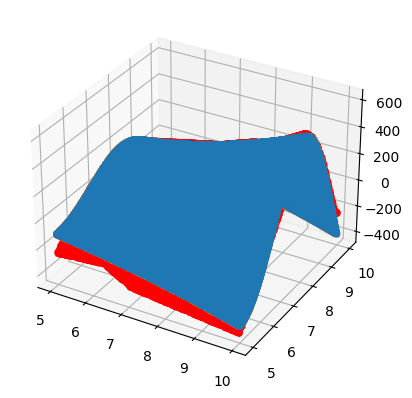

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# plot train data points
x1_vals = np.array([p[0] for p in x_train])
x2_vals = np.array([p[1] for p in x_train])

ax.scatter(x1_vals, x2_vals, y_train)

# plot test data points
x1_vals = np.array([p[0] for p in x_test])
x2_vals = np.array([p[1] for p in x_test])

ax.scatter(x1_vals, x2_vals, y_test, marker='x')
ax.scatter(x1_vals, x2_vals, predictions, c='red')
plt.show()

In [8]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
print("Error:", np.sqrt(mse))

MSE: 1069.093497884497
Error: 32.6969952424454


In [9]:
print(max(out))

590.202332016214


In [10]:
count = 0
max_out = max(out)
for i in range(0, len(y_test)):
    if (np.abs(predictions[i] - y_test[i]) < max_out / 10):
        count += 1
print(f'{count / len(y_test) :.3f}')

0.918
